In [5]:
#Import

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

In [8]:
# Load Data

df = pd.read_csv('cardio_train1.csv',sep=';')
df = df.dropna().drop('id',axis=1)
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,19834,1,164,68.0,110,60,1,1,0,0,0,0


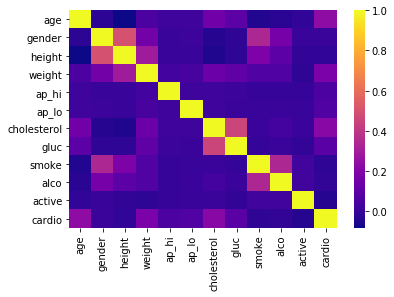

In [12]:

#Correlation Matrix

sns.heatmap(df.corr(),cmap='plasma')

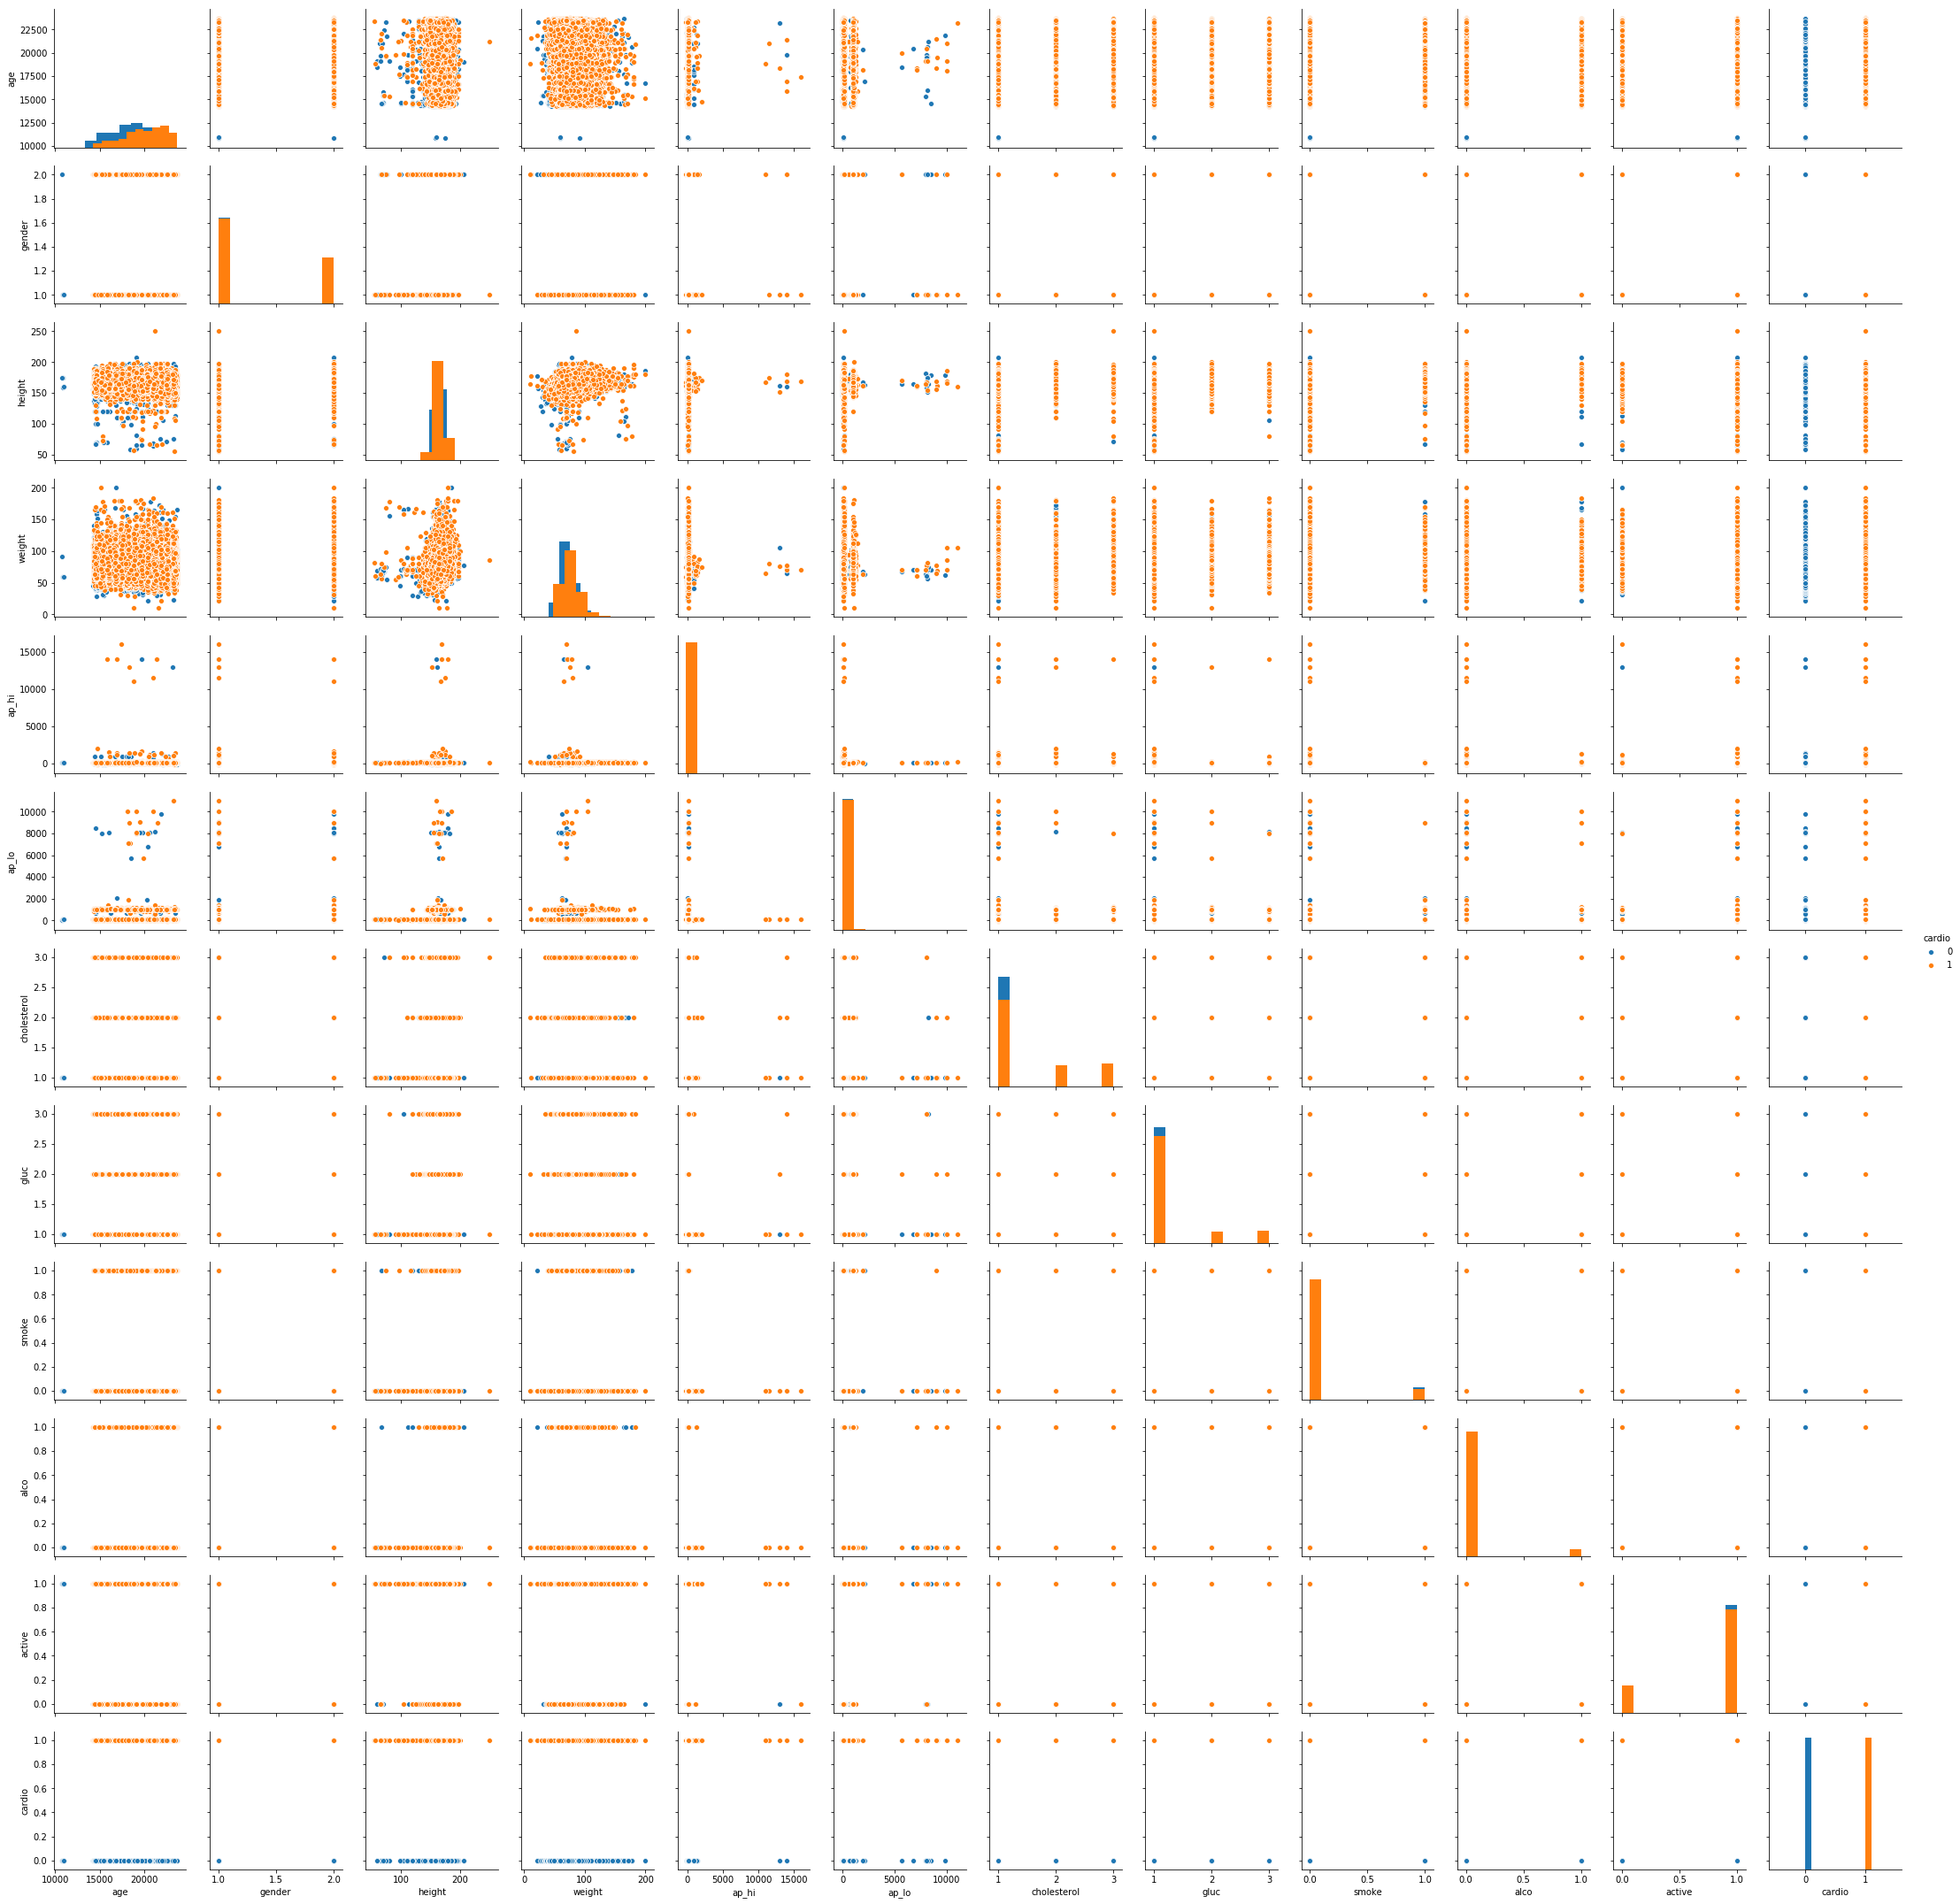

In [4]:
#Pairplot to explore data distribution for all features

sns.pairplot(df,hue='cardio',diag_kind='hist')
plt.savefig('pair.png')

In [5]:
# Get dummies for categorical values

df = pd.get_dummies(data=df,columns=['gender','cholesterol'])
df.head()

,age,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,cardio,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3
0,18393,168,62.0,110,80,1,0,0,1,0,0,1,1,0,0
1,20228,156,85.0,140,90,1,0,0,1,1,1,0,0,0,1
2,18857,165,64.0,130,70,1,0,0,0,1,1,0,0,0,1
3,17623,169,82.0,150,100,1,0,0,1,1,0,1,1,0,0
4,17474,156,56.0,100,60,1,0,0,0,0,1,0,1,0,0


In [6]:
# Train-test split

x_train, x_test, y_train, y_test = train_test_split(df.drop('cardio',axis=1),df['cardio'],random_state=0)

In [28]:
# Random Forest Classifier

rfc = RandomForestClassifier(n_estimators=500, criterion = 'entropy')
rfc.fit(x_train,y_train)
rf_score = rfc.score(x_test,y_test)
print(rfc.score(x_test,y_test))

0.7130857142857143


In [31]:
print(dict(zip(df.columns,rfc.feature_importances_)))

{'age': 0.32293997876445063, 'height': 0.1702557548251198, 'weight': 0.1904673934405498, 'ap_hi': 0.15162083777015428, 'ap_lo': 0.08136417055049516, 'gluc': 0.016233841800395735, 'smoke': 0.007945529176206273, 'alco': 0.007096147591052574, 'active': 0.012123659660916188, 'cardio': 0.005442887499114545, 'gender_1': 0.0054147413748183, 'gender_2': 0.013307729678684745, 'cholesterol_1': 0.0042770713121552595, 'cholesterol_2': 0.011510256555886098}


### In this dataset, Age and Weight of the individual are the most important features for prediction of the class (presence of heart condition in the individual)

In [8]:
# K Nearest neighbor Classifier

kn_scores = []
knn = [5,9,11,15,19]

for k in knn:
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(x_train,y_train)
    kn_scores.append(knc.score(x_test,y_test))

Text(0, 0.5, 'Accuracy %')

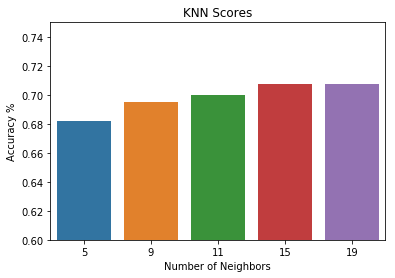

In [12]:
# Accuracy of different KNN Classifiers

sns.barplot(knn, kn_scores)
plt.ylim(0.6,0.75)
plt.title('KNN Scores')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy %')

In [13]:
# Logistic Regression

lr_scores=[]

lr = LogisticRegression(penalty='l1',solver= 'liblinear')
lr.fit(x_train,y_train)
lr_score = accuracy_score(y_test,lr.predict(x_test))
print(accuracy_score(y_test,lr.predict(x_test)))

0.7225714285714285


In [14]:

# Multi-Layer Perceptron 

mlp = MLPClassifier(hidden_layer_sizes=512,activation='logistic')
mlp.fit(x_train,y_train)
mlp_score = mlp.score(x_test,y_test)
print(mlp.score(x_test,y_test))

0.5126857142857143


In [15]:

#Naive Bayes 

gnb = GaussianNB()
#gnb.partial_fit(x_train, y_train,np.unique(y_train))
gnb.fit(x_train,y_train)
gnb_score = gnb.score(x_test, y_test)
print (gnb.score(x_test, y_test))

0.5981714285714286


In [16]:

# Voting Classifier

knn = KNeighborsClassifier(n_neighbors=15)
mlp = MLPClassifier(hidden_layer_sizes=512,activation='relu')
lr = LogisticRegression(penalty='l1',solver= 'liblinear')
gnb = GaussianNB()
rfc = RandomForestClassifier(n_estimators=500, criterion = 'entropy')

vc = VotingClassifier(estimators=[('knn',knn),('lr',lr),('rfc',rfc)], voting='soft')

In [17]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scalin...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [18]:
# Voting Score

vc_score = vc.score(x_test, y_test)
print (vc.score(x_test, y_test))

0.7262857142857143


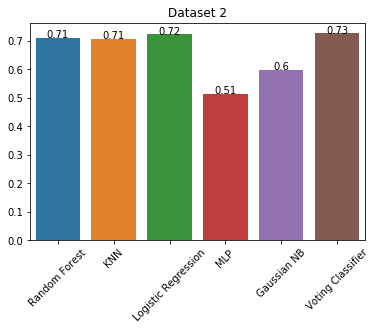

In [19]:
label = ['Random Forest','KNN','Logistic Regression','MLP','Gaussian NB','Voting Classifier']
scores = [rf_score,kn_scores[3],lr_score,mlp_score,gnb_score,vc_score]
sns.barplot(x=label,y=scores)
plt.xticks(rotation=45)
for i in range(len(label)):
    plt.text(i,scores[i],round(scores[i],2),horizontalalignment='center')
plt.title('Dataset 1')
plt.savefig('results.png')

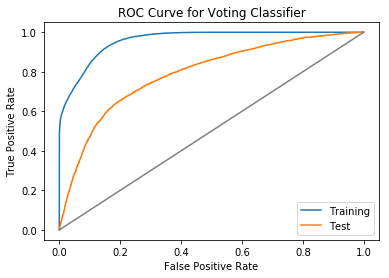

In [20]:
# ROC Curve for Voting Classifier

fpr,tpr,thres = roc_curve(y_train,vc.predict_proba(x_train)[::,1])
fpr2,tpr2,thres2 = roc_curve(y_test,vc.predict_proba(x_test)[::,1])
plt.plot(fpr,tpr,label='Training')
plt.plot(fpr2,tpr2,label='Test')
plt.plot([0,1],[0,1],c='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.savefig('Voting Classifier ROC.png')